# Tarea 7 CFSA3180
## Rectificación Semilogarítmica y la Ley de Enfriamiento de Newton

En esta tarea exploraremos dos conceptos fundamentales en el análisis de datos experimentales: la **rectificación semilogarítmica** y la **ley de enfriamiento de Newton**. Aprenderemos cómo utilizar gráficos semilogarítmicos para analizar procesos exponenciales y aplicaremos la ley de enfriamiento para modelar la pérdida de calor en objetos. Los ejercicios incluyen la interpretación de datos, el ajuste de curvas y la validación de modelos matemáticos.

IMPORTANTE: EJECUTA EL SIGUIENTE BLOQUE PARA INSTALAR LAS LIBRERÍAS NECESARIAS PARA LA TAREA. SI YA LAS TIENES INSTALADAS, NO ES NECESARIO VOLVER A EJECUTARLO

In [ ]:
%pip install pandas numpy matplotlib



Preparamos las variables con las que vamos a trabajar en la tarea. ademas de leer los datos desde el archivo `data.csv` que contiene los datos de temperatura y tiempo.


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


TEMPERATURA_AMBIENTE = 20  # Temperatura ambiente en grados Celsius

df = pd.read_csv('data.csv', sep=',' )

df['t_s'] = pd.to_timedelta(df['Tiempo']).dt.total_seconds()

df['Delta_T'] = df['Temperatura'] - TEMPERATURA_AMBIENTE





Graficamos los datos de temperatura en funcion del tiempo.

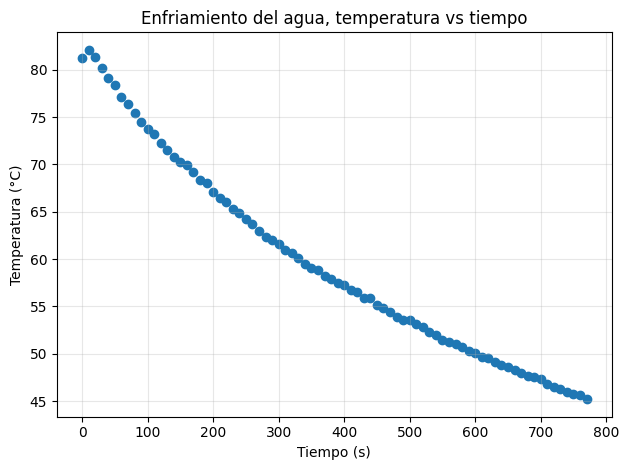

In [30]:
# scatter plot
plt.scatter(df['t_s'], df['Delta_T'], label='Datos experimentales')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Enfriamiento del agua, temperatura vs tiempo')
plt.grid(True, which='both', alpha=0.3)
plt.tight_layout()
plt.show()

Realizamos una rectificación semilogarítmica de los datos de temperatura. Esto nos permitirá visualizar mejor la relación exponencial entre la temperatura y el tiempo.

Constante de enfriamiento (k): 0.0008 s^-1
Temperatura inicial menos temperatura ambiente (T0 - T_ambiente): 78.9227 °C
Coeficiente de determinación (R^2): 0.9889


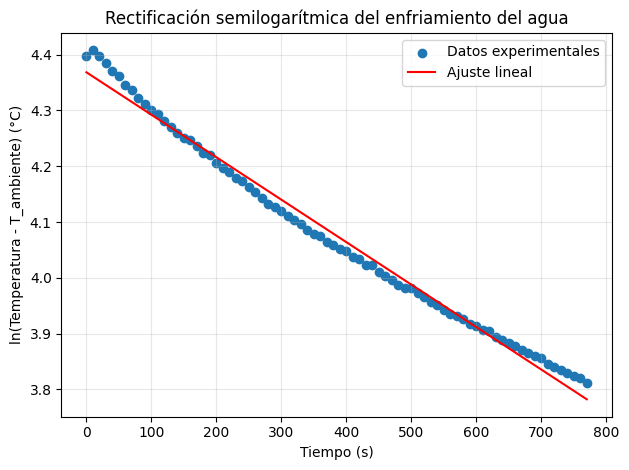

In [33]:
# usar datos para rectificación semilogarítmica
df_fit = df[df['Delta_T'] > 0]  # Filtrar solo los datos donde Delta_T es positivo
df_fit['ln_Delta_T'] = np.log(df_fit['Delta_T'])

# ajuste lioneal de la rectificación semilogarítmica
m, b = np.polyfit(df_fit['t_s'], df_fit['ln_Delta_T'], 1)

k = -m  # La pendiente es -k

T0_menos_T_ambiente = np.exp(b)  # T0 - T_ambiente
y_pred = m* df_fit['t_s'] + b

ss_res = np.sum((df_fit['ln_Delta_T'] - y_pred) ** 2)
ss_tot = np.sum((df_fit['ln_Delta_T'] - np.mean(df_fit['ln_Delta_T'])) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print(f"Constante de enfriamiento (k): {k:.4f} s^-1")
print(f"Temperatura inicial menos temperatura ambiente (T0 - T_ambiente): {T0_menos_T_ambiente:.4f} °C")
print(f"Coeficiente de determinación (R^2): {r_squared:.4f}")
plt.scatter(df_fit['t_s'], df_fit['ln_Delta_T'], label='Datos experimentales')
plt.plot(df_fit['t_s'], y_pred, color='red', label='Ajuste lineal')
plt.xlabel('Tiempo (s)')
plt.ylabel('ln(Temperatura - T_ambiente) (°C)')
plt.title('Rectificación semilogarítmica del enfriamiento del agua')
plt.grid(True, which='both', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()



Predecimos la temperatura en función del tiempo usando la ley de enfriamiento de Newton. usando el tiempo objetivo de 20 minutos (1200 segundos).

Predicción de la temperatura a los 20 minutos: 51.6560 °C


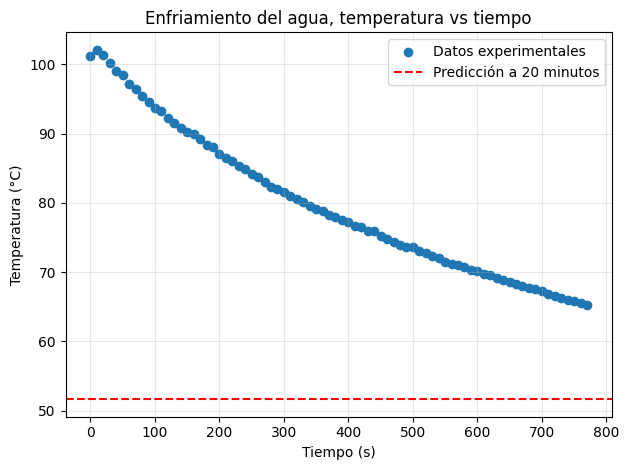

In [32]:
t_pred = 20 * 60  # 20 minutos en segundos
T_pred = TEMPERATURA_AMBIENTE + T0_menos_T_ambiente * np.exp (-k * t_pred)

print(f"Predicción de la temperatura a los 20 minutos: {T_pred:.4f} °C")
# Graficamos los datos de temperatura en función del tiempo.
plt.scatter(df['t_s'], df['Temperatura'], label='Datos experimentales')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Enfriamiento del agua, temperatura vs tiempo')
plt.axhline(y=T_pred, color='red', linestyle='--', label='Predicción a 20 minutos')
plt.grid(True, which='both', alpha=0.3)
plt.legend()
plt.tight_layout()

plt.show()

Ahora calculamos el tiempo necesario para que la temperatura alcance el 63% de su valor inicial, por lo que es necesario calcular la temperatura objetivo como el 63% de la temperatura inicial. Luego, calculamos el tiempo necesario para que la temperatura alcance este valor usando la ley de enfriamiento de Newton.

Tiempo necesario para alcanzar el 63% de la temperatura inicial: 606.9160 s
Temperatura a los 606.9160 segundos: 71.1560 °C


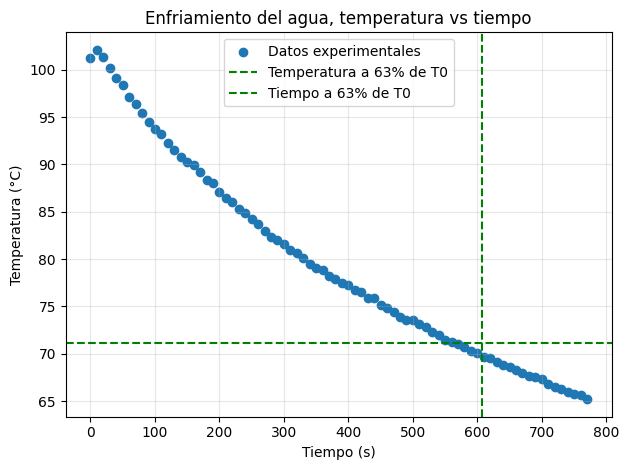

In [34]:
idx0 = df['t_s'].idxmin()
T0 = float(df.loc[idx0, 'Temperatura'])
DeltaT0 = T0 - TEMPERATURA_AMBIENTE  # T0 - T_ambiente

frac = 0.63
t_63 = (1.0 / k) * np.log(1.0 / frac)          # segundos
T_63 = TEMPERATURA_AMBIENTE + DeltaT0 * frac  # T_63 = T_ambiente + (T0 - T_ambiente) * 0.63

print(f"Tiempo necesario para alcanzar el 63% de la temperatura inicial: {t_63:.4f} s")
print(f"Temperatura a los {t_63:.4f} segundos: {T_63:.4f} °C")
plt.scatter(df['t_s'], df['Temperatura'], label='Datos experimentales')
plt.axhline(y=T_63, color='green', linestyle='--', label='Temperatura a 63% de T0')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.title('Enfriamiento del agua, temperatura vs tiempo')
plt.axvline(x=t_63, color='green', linestyle='--', label='Tiempo a 63% de T0')
plt.grid(True, which='both', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()
